<a href="https://colab.research.google.com/github/ELVAN13091999/my-first-binder/blob/main/Data_Science_In_Health_Care_Using_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spreading Covid19 in Indonesia by Advanced prognostication using Neural Networks   
Personal Project By Elvan Vensiando

Special thanks to IBM Corporation and MIT for providing free online courses in cognitiveclass.ai

Special thanks to Hannah Ritchie, Edouard Mathieu, Lucas Rodés-Guirao, Cameron Appel, Charlie Giattino, Esteban Ortiz-Ospina, Joe Hasell, Bobbie Macdonald, Diana Beltekian and Max Roser (2020) - "Coronavirus Pandemic (COVID-19)". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/coronavirus' [Online Resource]

-> Import Library, Download Data and Preliminary Analysis

In [3]:
import pandas as pd
import numpy as np

In [4]:
#firstly, upload data to file
covid_word = pd.read_csv('owid-covid-data.csv')
covid_word

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117461,ZWE,Africa,Zimbabwe,2021-09-13,126399.0,130.0,104.000,4543.0,5.0,7.143,8375.137,8.614,6.891,301.017,0.331,0.473,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4063.0,1188549.0,78.753,0.269,3654.0,0.242,0.028,35.1,tests performed,4752356.0,2856655.0,1895701.0,NaN,NaN,41369.0,31.49,18.93,12.56,NaN,2741.0,65.74,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
117462,ZWE,Africa,Zimbabwe,2021-09-14,126817.0,418.0,145.857,4550.0,7.0,6.714,8402.833,27.696,9.664,301.481,0.464,0.445,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5427.0,1193976.0,79.112,0.360,3900.0,0.258,0.037,26.7,tests performed,4800761.0,2873593.0,1927168.0,NaN,48405.0,43831.0,31.81,19.04,12.77,NaN,2904.0,65.74,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
117463,ZWE,Africa,Zimbabwe,2021-09-15,127083.0,266.0,164.571,4551.0,1.0,4.857,8420.459,17.625,10.904,301.547,0.066,0.322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6482.0,1200458.0,79.542,0.429,3899.0,0

-> Let's recognized types of data correctly

In [5]:
covid_word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117466 entries, 0 to 117465
Data columns (total 62 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               117466 non-null  object 
 1   continent                              112095 non-null  object 
 2   location                               117466 non-null  object 
 3   date                                   117466 non-null  object 
 4   total_cases                            111681 non-null  float64
 5   new_cases                              111678 non-null  float64
 6   new_cases_smoothed                     110663 non-null  float64
 7   total_deaths                           101006 non-null  float64
 8   new_deaths                             101161 non-null  float64
 9   new_deaths_smoothed                    110663 non-null  float64
 10  total_cases_per_million                111092 non-null  

As we can see the first 4th columns and test_units are object, Let's investigate them

In [6]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields]

,iso_code,continent,location,tests_units
0,AFG,Asia,Afghanistan,NaN
1,AFG,Asia,Afghanistan,NaN
2,AFG,Asia,Afghanistan,NaN
3,AFG,Asia,Afghanistan,NaN
4,AFG,Asia,Afghanistan,NaN
...,...,...,...,...
117461,ZWE,Africa,Zimbabwe,tests performed
117462,ZWE,Africa,Zimbabwe,tests performed
117463,ZWE,Africa,Zimbabwe,tests performed
117464,ZWE,Africa,Zimbabwe,NaN


-> Let's investigate detail of the fields data

In [7]:
covid_word[fields]

,iso_code,continent,location,tests_units
0,AFG,Asia,Afghanistan,NaN
1,AFG,Asia,Afghanistan,NaN
2,AFG,Asia,Afghanistan,NaN
3,AFG,Asia,Afghanistan,NaN
4,AFG,Asia,Afghanistan,NaN
...,...,...,...,...
117461,ZWE,Africa,Zimbabwe,tests performed
117462,ZWE,Africa,Zimbabwe,tests performed
117463,ZWE,Africa,Zimbabwe,tests performed
117464,ZWE,Africa,Zimbabwe,NaN


In [8]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields] = covid_word[fields].astype('category')
covid_word.loc[:, 'date'] = pd.to_datetime(covid_word['date'])
covid_word[fields].describe()

,iso_code,continent,location,tests_units
count,117466,112095,117466,62379
unique,233,6,233,4
top,PER,Africa,Argentina,tests performed
freq,626,29839,626,39159


assigned fields to categorical fields because of many repetitions

-> Let's show a list of countries

In [9]:
covid_word['location'].cat.categories

Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uzbekistan', 'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=233)

-> Let's investigate the dynamics of new cases of COVID-19 for a separate country. We will use Indonesia for saving models and further forecast. Let's use a pandas filter to do this.

In [10]:
covid_word.index = covid_word['date']

c_covid = covid_word[covid_word['location'] == "Indonesia"]
c_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-02,IDN,Asia,Indonesia,2020-03-02,2.0,2.0,NaN,NaN,NaN,NaN,0.007,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.70,276361788.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN
2020-03-03,IDN,Asia,Indonesia,2020-03-03,2.0,0.0,NaN,NaN,NaN,NaN,0.007,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.04,276361788.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN
2020-03-04,IDN,Asia,Indonesia,2020-03-04,2.0,0.0,NaN,NaN,NaN,NaN,0.007,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.04,276361788.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN
2020-03-05,IDN,Asia,Indonesia,2020-03-05,2.0,0.0,NaN,NaN,NaN,NaN,0.007,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.04,276361788.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN
2020-03-06,IDN,Asia,Indonesia,2020-03-06,4.0,2.0,NaN,NaN,NaN,NaN,0.014,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.04,276361788.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,IDN,Asia,Indonesia,2021-09-13,4170088.0,2577.0,5236.429,139165.0,276.0,384.571,15089.235,9.325,18.948,503.561,0.999,1.392,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23199268.0,83.945,NaN,141506.0,0.512,0.037,27.0,people tested,116168745.0,73839683.0,42329062.0,NaN,1667816.0,1355940.0,42.04,26.72,15.32,NaN,4906.0,68.98,276361788.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN
2021-09-14,IDN,Asia,Indonesia,2021-09-14,4174216.0,4128.0,4797.429,139415.0,250.0,322.714,15104.172,14.937,17.359,504.466,0.905,1.168,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116822846.0,74257515.0,42565331.0,NaN,654101.0,1349754.0,42.27,26.87,15.40,NaN,4884.0,NaN,276361788.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN
2021-09-15,IDN,Asia,Indonesia,2021-09-15,4178164.0

-> 
Let's choose the fields 'new_cases', 'new_cases_smoothed' for forecasting. First of all, we should visualize this data.

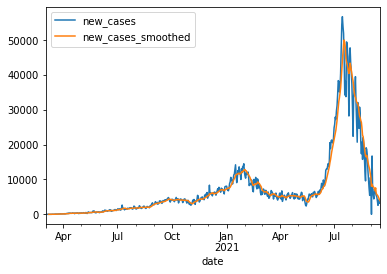

In [11]:
import matplotlib.pyplot as plt
fields = ['new_cases', 'new_cases_smoothed']
c_covid[fields].plot()
plt.show()

As we can see, there are large fluctuations in the new cases plot. Let's try to make a forecast for these waves. First of all, we should delete missing data using pandas.DataFrame.dropna()

In [12]:
c_covid = c_covid[fields].dropna()
c_covid

,new_cases,new_cases_smoothed
date,,
2020-03-07,0.0,0.571
2020-03-08,2.0,0.857
2020-03-09,13.0,2.429
2020-03-10,8.0,3.571
2020-03-11,7.0,4.571
...,...,...
2021-09-13,2577.0,5236.429
2021-09-14,4128.0,4797.429
2021-09-15,3948.0,4399.857


-> If we want to make a forecast of time series, the only assumption that can be made - the data for today depends on the previous days values. To check for dependencies, it is necessary to perform a correlation analysis between them. This requires:
 
1.   duplicating the time series of data and moving it
2.   vertically down for a certain number of days (lag)
3.   deleting the missing data at the beginning and end (they are formed by vertical shift (pandas.DataFrame.shift())
4.   calculating the correlation coefficient between the obtained series.



Since this operation should be performed for different values of the lag, it is convenient to create a separate function:

In [13]:
def lag_correlation_ts(y, x, lag):
    """
    Lag correlation for 2 DateSeries
    :param y: fixed
    :param x: shifted
    :param lag: lag for shifting
    :return: DataFrame of lags correlation coefficients
    """
    r = [0] * (lag + 1)
    y = y.copy()
    x = x.copy()
    y.name = "y"
    x.name = "x"

    for i in range(0, lag + 1):
        ds = y.copy().to_frame()
        ds = ds.join(x.shift(i), how='outer')
        r[i] = ds.corr().values[0][1]
    r = pd.DataFrame(r)
    r.index.names = ['Lag']
    r.columns = ['Correlation']
    return r

-> Let's create a target DataSet.

In [14]:
y_dataset = c_covid['new_cases']
y_dataset

date
2020-03-07       0.0
2020-03-08       2.0
2020-03-09      13.0
2020-03-10       8.0
2020-03-11       7.0
               ...  
2021-09-13    2577.0
2021-09-14    4128.0
2021-09-15    3948.0
2021-09-16    3145.0
2021-09-17    3835.0
Name: new_cases, Length: 560, dtype: float64

-> Let's test a 30-day lag.

     Correlation
Lag             
0         1.0000
1         0.9737
2         0.9550
3         0.9412
4         0.9324
5         0.9326
6         0.9342
7         0.9340
8         0.9133
9         0.8931
10        0.8780
11        0.8607
12        0.8519
13        0.8465
14        0.8377
15        0.8107
16        0.7791
17        0.7577
18        0.7375
19        0.7250
20        0.7135
21        0.6983
22        0.6678
23        0.6388
24        0.6145
25        0.5915
26        0.5769
27        0.5623
28        0.5483
29        0.5167
30        0.4889


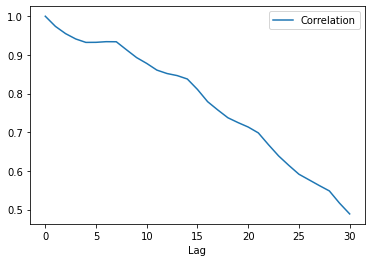

In [15]:
pd.options.display.float_format = '{:,.4f}'.format
l = pd.DataFrame(lag_correlation_ts(y_dataset, y_dataset, 30)) #For time series we should use y_Dataset like input and output
print(l)
l.plot()

As we can see, there are some waves observed in the lag plot. You can see from the table that there is a peak for every seventh day. (Maximum lags are: 7, 14, 21, etc. days). This is due to the weekly cycle.

Any forecast model can be shown as a black box of input-target type. The target should be the data of the original time series, and the input should be the values for the previous days.

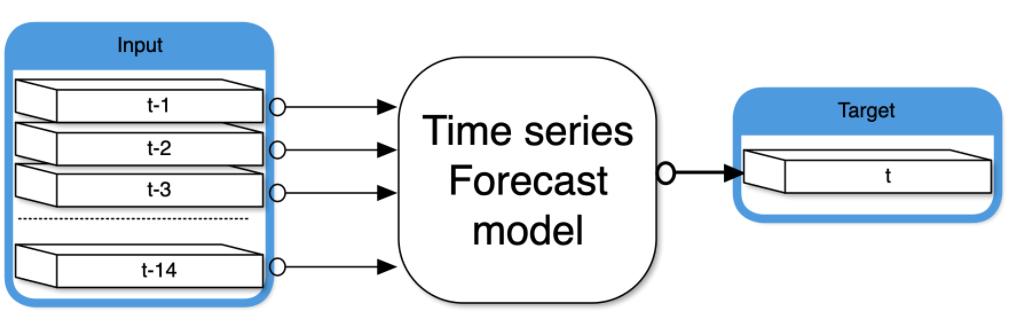

-> To automate this process, let's make a universal function for time series transformation to create this DataSet.

In [16]:
def series_to_supervised(in_data, tar_data, n_in=1, dropnan=True, target_dep=False):
    """
    Transformation into a training sample taking into account the lag
     : param in_data: Input fields
     : param tar_data: Output field (single)
     : param n_in: Lag shift
     : param dropnan: Do destroy empty lines
     : param target_dep: Whether to take into account the lag of the input field. If taken into account, the input will start with a lag 1
     : return: Training sample. The last field is the source
    """

    n_vars = in_data.shape[1]
    cols, names = list(), list()

    if target_dep:
        i_start = 1
    else:
        i_start = 0
    for i in range(i_start, n_in + 1):
        cols.append(in_data.shift(i))
        names += [('%s(t-%d)' % (in_data.columns[j], i)) for j in range(n_vars)]

    if target_dep:
        for i in range(n_in, -1, -1):
            cols.append(tar_data.shift(i))
            names += [('%s(t-%d)' % (tar_data.name, i))]
    else:
        # put it all together
        cols.append(tar_data)
        names.append(tar_data.name)
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

As mentioned above, when forecasting time series, the input and output fields are the same, only shifted by the lag.

In [17]:
dataset = series_to_supervised(pd.DataFrame(y_dataset), y_dataset, 14) ##target data based previous days
dataset

,new_cases(t-0),new_cases(t-1),new_cases(t-2),new_cases(t-3),new_cases(t-4),new_cases(t-5),new_cases(t-6),new_cases(t-7),new_cases(t-8),new_cases(t-9),new_cases(t-10),new_cases(t-11),new_cases(t-12),new_cases(t-13),new_cases(t-14),new_cases
date,,,,,,,,,,,,,,,,
2020-03-21,81.0000,58.0000,84.0000,55.0000,38.0000,17.0000,21.0000,27.0000,35.0000,0.0000,7.0000,8.0000,13.0000,2.0000,0.0000,81.0000
2020-03-22,64.0000,81.0000,58.0000,84.0000,55.0000,38.0000,17.0000,21.0000,27.0000,35.0000,0.0000,7.0000,8.0000,13.0000,2.0000,64.0000
2020-03-23,65.0000,64.0000,81.0000,58.0000,84.0000,55.0000,38.0000,17.0000,21.0000,27.0000,35.0000,0.0000,7.0000,8.0000,13.0000,65.0000
2020-03-24,107.0000,65.0000,64.0000,81.0000,58.0000,84.0000,55.0000,38.0000,17.0000,21.0000,27.0000,35.0000,0.0000,7.0000,8.0000,107.0000
2020-03-25,104.0000,107.0000,65.0000,64.0000,81.0000,58.0000,84.0000,55.0000,38.0000,17.0000,21.0000,27.0000,35.0000,0.0000,7.0000,104.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,"2,577.0000","3,779.0000","5,001.0000","5,376.0000","5,990.0000","6,731.0000","7,201.0000","4,413.0000","5,403.0000","6,727.0000","16,752.0000",0.0000,"10,337.0000","10,534.0000","5,436.0000","2,577.0000"
2021-09-14,"4,128.0000","2,577.0000","3,779.0000","5,001.0000","5,376.0000","5,990.0000","6,731.0000","7,201.0000","4,413.0000","5,403.0000","6,727.0000","16,752.0000",0.0000,"10,337.0000","10,534.0000","4,128.0000"
2021-09-15,"3,948.0000","4,128.0000","2,577.0000","3,779.0000","5,001.0000","5,376.0000","5,990.0000","6,731.0000","7,201.0000","4,413.0000","5,403.0000","6,727.0000","16,752.0000",0.0000,"10,337.0000","3,948.0000"


-> As we can see, the first and last columns contain the same target data. Now we should create input (X) and output (Y) DataSets for forecasting models.

In [18]:
col = dataset.columns
X, Y = dataset[col[1:-1]], dataset[col[-1]]
print("Input: ", X.columns)
print("Target:", Y.name)

Input:  Index(['new_cases(t-1)', 'new_cases(t-2)', 'new_cases(t-3)', 'new_cases(t-4)',
       'new_cases(t-5)', 'new_cases(t-6)', 'new_cases(t-7)', 'new_cases(t-8)',
       'new_cases(t-9)', 'new_cases(t-10)', 'new_cases(t-11)',
       'new_cases(t-12)', 'new_cases(t-13)', 'new_cases(t-14)'],
      dtype='object')
Target: new_cases


-> After that, we should normalize all the data. To do this, the sklearn.preprocessing.MinMaxScaler module should be used. It allows us to normalize fit_transform() and convert back all the data easily: fit_transform().

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_x = scaler_x.fit_transform(X)
scaled_y = scaler_y.fit_transform(Y.values.reshape(-1, 1))

After that, we are going to form training and test DataSets using sklearn.model_selection.train_test_split(). We will make them at the ratio of 70/30. Without shuffling. It means, that test samples are located in the end of X and Y DataSets.

Input normalized DataSets: X_train, X_test

Target normalized DataSets: y_train, y_test

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.3, shuffle=False)

All the data is normalized now. However, in order to compare to results, we need real scale data of the training and test DataSet:

In [21]:
res_train = scaler_y.inverse_transform(y_train).flatten()
res_test = scaler_y.inverse_transform(y_test).flatten()

Target real scale DataSets: res_train, res_test.

# Three type of models. A Linear regression, a Multilayer Neural Network with Backpropagation and a Long Short-Term Memory Neural Network. 

-> Let's create a LinearRegression():

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

After that, our model should be fitted on the training DataSet. Regardless of the model type, the function fit() is used to do this.

In [23]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

-> We can test it on the test DataSet and use it for prognostication.

In [24]:
y_pred_test_ln = regressor.predict(X_test)
y_pred_test_ln = scaler_y.inverse_transform(y_pred_test_ln).flatten()

-> Let's analyze the results accuracy using sklearn.metrics.

In [25]:
from sklearn import metrics
print("Correlation train", regressor.score(X_train, y_train))
print("Correlation test", regressor.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_ln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_ln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ln)))

Correlation train 0.9690726751553604
Correlation test 0.9268958308903932
Mean Absolute Error: 16012.191407307837
Mean Squared Error: 451457290.60015607
Root Mean Squared Error: 21247.52434050038


The modern approach to the establishment of complex functional dependencies is the use of neural networks. A classical neural network is a multilayer neural network with back propagation.

To do this, we will use the keras framework. First of all, we should create a Neural Network model as a separate function.

A neural network is a sequence of layers. The function Sequential() is used to create a network.

Let's create a network that consists of 2 hidden layers. Each of which consists of 100 neurons. keras.layers.Dense().

To avoid retraining problems, we will use additional layers keras.layers.Dropout().

The output layer will consist of one neuron, since we have only one value at the output.

The model should be compiled for fitting and predicting: keras.Model.compile().

-> Let's make a Multilayer Neural Network with Backpropagation 

In [26]:
def BP_model(X):
    """
    Multilayer neural network with back propagation.
    :param X: Input DataSet
    :return: keras NN model
    """
    # create model
    model = Sequential() 
    model.add(Dense(100, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

Once the model function is built, it is necessary to create a neural network directly and specify the learning parameters: keras.wrappers.scikit_learn.KerasRegressor(). Also we should define the number of fitting epoch and batch size.

In [27]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
epochs = 1000

batch_size=int(y_train.shape[0]*.1)

estimator = KerasRegressor(build_fn=BP_model, X=X_train, epochs=epochs, batch_size=batch_size, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  if __name__ == '__main__':


Now, let’s train our model for 1000 epochs. It should be noted that the fitting process is very slow. Therefore, we saved our fitted model to a file. To save time, we will upload the fitted model. If we like, we can leave the parameter fitting on True to refit the model. If you like, we can leave the parameter fitting_save on True to resave the model.

In [28]:
fitting = True
fitting_save = True

import pickle

if fitting:
    history=estimator.fit(X_train,y_train, validation_data=(X_test,y_test)) # Fitting model
    if fitting_save:
        # Save model
        estimator.model.save('BP_saved_model.h5')
        print("Saved model to disk")
        with open('history.pickle', 'wb') as f:
            pickle.dump(history.history, f)
# load model 
from keras.models import load_model

# Instantiate the model as you please (we are not going to use this)
estimator = KerasRegressor(build_fn=BP_model, X=X_train, epochs=epochs, batch_size=batch_size, verbose=1)
# This is where you load the actual saved model into a new variable.
estimator.model = load_model('BP_saved_model.h5')    
with open('history.pickle', 'rb') as f:
    history = pickle.load(f)
print("Loaded model from disk")

Epoch 1/1000
11/11 [==============================] - 1s 19ms/step - loss: 0.0051 - val_loss: 0.0552
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0214
Epoch 3/1000
11/11 [==============================] - 0s 7ms/step - loss: 8.7981e-04 - val_loss: 0.0175
Epoch 4/1000
11/11 [==============================] - 0s 6ms/step - loss: 4.1961e-04 - val_loss: 0.0122
Epoch 5/1000
11/11 [==============================] - 0s 6ms/step - loss: 4.5170e-04 - val_loss: 0.0124
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 3.8110e-04 - val_loss: 0.0118
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 4.0494e-04 - val_loss: 0.0124
Epoch 8/1000
11/11 [==============================] - 0s 7ms/step - loss: 3.9698e-04 - val_loss: 0.0117
Epoch 9/1000
11/11 [==============================] - 0s 6ms/step - loss: 3.9054e-04 - val_loss: 0.0118
Epoch 10/1000
11/11 [==============================] - 0s 7ms/step - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


-> Let's show the loss and validation loss dynamics.

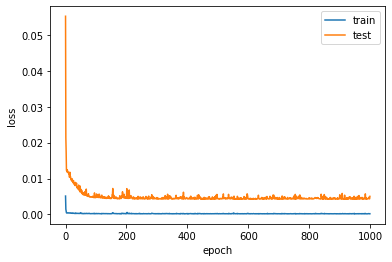

In [29]:
plt.figure()
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.plot(history.history['acc'], label='acc')
#plt.plot(history.history['val_acc'], label='acc test')
plt.legend()
plt.show()

As we can see, a Neural Network is well-fitted and no overfitting is observed. Let's calculate a prediction of the training (res_train_ANN) an test (res_test_ANN) sets.

-> Let's calculate a forecast and make an inverse normalization to real scale.

In [30]:
res_tr=estimator.predict(X_train)
res_ts=estimator.predict(X_test)
res_train_ANN=scaler_y.inverse_transform(res_tr.reshape(-1, 1)).flatten()
res_test_ANN=scaler_y.inverse_transform(res_ts.reshape(-1, 1)).flatten()

5/5 [==============================] - 0s 3ms/step


Let's compare the accuracy of a Linear Regression and a Neural Network.

In [31]:
print("Correlation train", np.corrcoef(res_train, res_train_ANN)[0,1])
print("Correlation test", np.corrcoef(res_test, res_test_ANN)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_ANN))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_ANN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_ANN)))

Correlation train 0.9852830089355795
Correlation test 0.9660568277513011
Mean Absolute Error: 17212.014040537095
Mean Squared Error: 520371602.5964304
Root Mean Squared Error: 22811.65497276404


We got slightly better results for a Neural Network than for a Linear Regression.

Unlike standard feedforward neural networks, LSTM has feedback connections. It can process not only single data points, but also entire sequences of data (such as speech, video or time series).

In case of time series, the neural network has one input and one output. However, there should be a vector of time series values for the previous time period on the input.

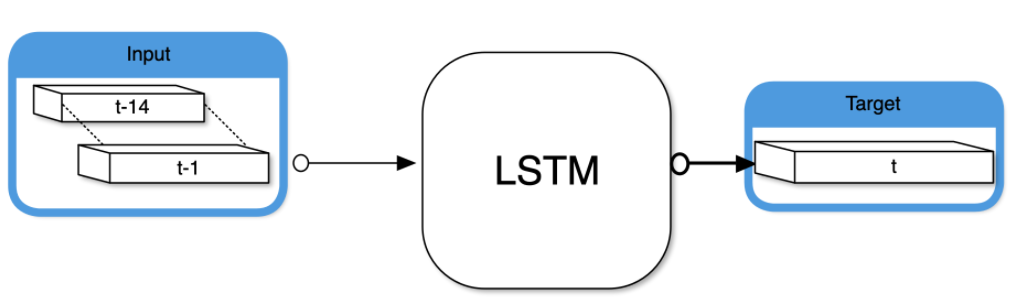

-> Let's Long Short-Term Memory Neural Network.
To do this, we should transform input DataSets into 3D shape.

In [32]:
train_x_LSTM = X_train.reshape((X_train.shape[0], 1, 14))
test_x_LSTM = X_test.reshape((X_test.shape[0], 1, 14))

-> Let's create an LSTM Neural Network consisting of one LSTM layer and one BP layer like in the previous case. As you can see, in this case our NN will consist of 7 LSTM and 7 BP neurons only.

In [33]:
from keras.layers import LSTM

batch_size=int(y_train.shape[0]*.1)
model = Sequential()
model.add(LSTM(7, input_shape=(train_x_LSTM.shape[1], train_x_LSTM.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(7, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1])) #activation='sigmoid'
model.compile(loss='mean_squared_error', optimizer='adam')
#model.compile(loss='mae', optimizer='adam')


-> All subsequent steps of learning, storing, reading and predicting are similar to the ones we used with the previous neural network. We can see that only 400 epochs are enough for an LSTM.

In [34]:
fitting = True
fitting_save = True
epochs = 400

if fitting:
    history = model.fit(train_x_LSTM, y_train, epochs=epochs, batch_size=batch_size, validation_data=(test_x_LSTM, y_test), verbose=1, shuffle=False)    
    if fitting_save:
    # serialize model to JSON
        model_json = model.to_json()
        with open("LSTM_model.json", "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        model.save_weights("LSTM_model.h5")
        print("Saved model to disk")
        with open('history_LSTM.pickle', 'wb') as f:
            pickle.dump(history.history, f)
# load model  
from keras.models import model_from_json
json_file = open('LSTM_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("LSTM_model.h5")        
with open('history_LSTM.pickle', 'rb') as f:
    history = pickle.load(f)
print("Loaded model from disk")

Epoch 1/400
11/11 [==============================] - 3s 61ms/step - loss: 0.0063 - val_loss: 0.1298
Epoch 2/400
11/11 [==============================] - 0s 6ms/step - loss: 0.0042 - val_loss: 0.1151
Epoch 3/400
11/11 [==============================] - 0s 6ms/step - loss: 0.0033 - val_loss: 0.1048
Epoch 4/400
11/11 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 0.0977
Epoch 5/400
11/11 [==============================] - 0s 7ms/step - loss: 0.0029 - val_loss: 0.0929
Epoch 6/400
11/11 [==============================] - 0s 8ms/step - loss: 0.0029 - val_loss: 0.0896
Epoch 7/400
11/11 [==============================] - 0s 8ms/step - loss: 0.0028 - val_loss: 0.0868
Epoch 8/400
11/11 [==============================] - 0s 7ms/step - loss: 0.0027 - val_loss: 0.0842
Epoch 9/400
11/11 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0814
Epoch 10/400
11/11 [==============================] - 0s 7ms/step - loss: 0.0027 - val_loss: 0.0777
Epoch 11

-> Let's plot the dynamic of loss and val loss like in the previous case.

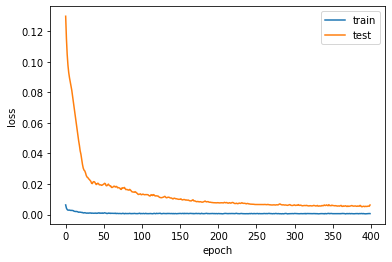

In [35]:
plt.figure()
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend()
plt.show() 

-> Let's calculate our forecast.

In [36]:
res_tr_LSTM = model.predict(train_x_LSTM)
res_ts_LSTM = model.predict(test_x_LSTM)
res_train_LSTM=scaler_y.inverse_transform(res_tr_LSTM).flatten()
res_test_LSTM=scaler_y.inverse_transform(res_ts_LSTM).flatten()

-> Let's calculate accuracy

In [37]:
print("Correlation train", np.corrcoef(res_train, res_train_LSTM)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_LSTM)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_LSTM))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_LSTM))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_LSTM)))


Correlation train 0.9785436510628981
Correlation train 0.9610595598954806
Mean Absolute Error: 14437.889083708296
Mean Squared Error: 363920945.54806477
Root Mean Squared Error: 19076.712126256578


-> As we can see, the forecast results of the test data set are much better than ones of the previous models. Let's visualize these 3 results:

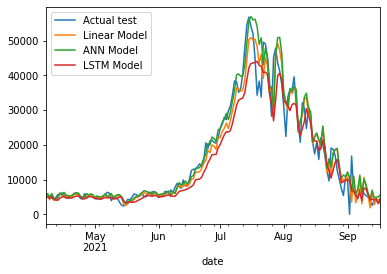

In [38]:
res_pred_test_ln = pd.Series(y_pred_test_ln, name = 'Predicted test Linear Model')
res_pred_test_ANN = pd.Series(res_test_ANN, name = 'Predicted test ANN')
res_pred_test_LSTM = pd.Series(res_test_LSTM, name = 'Predicted test LSTM')

df_2 = pd.DataFrame({'Actual test': res_test, 'Linear Model': res_pred_test_ln, 'ANN Model': res_pred_test_ANN,  'LSTM Model': res_pred_test_LSTM,})
df_2.index = dataset.index[len(dataset)-len(res_test):]
df_2.plot()
plt.show()

Conclusion 
As we can see, an LSTM model makes a perfect forecast. A Linear Regression is the fastest forecasting model.
